In [1]:
import qiskit
import numpy as np
import tqix as tq

1.203972804325936


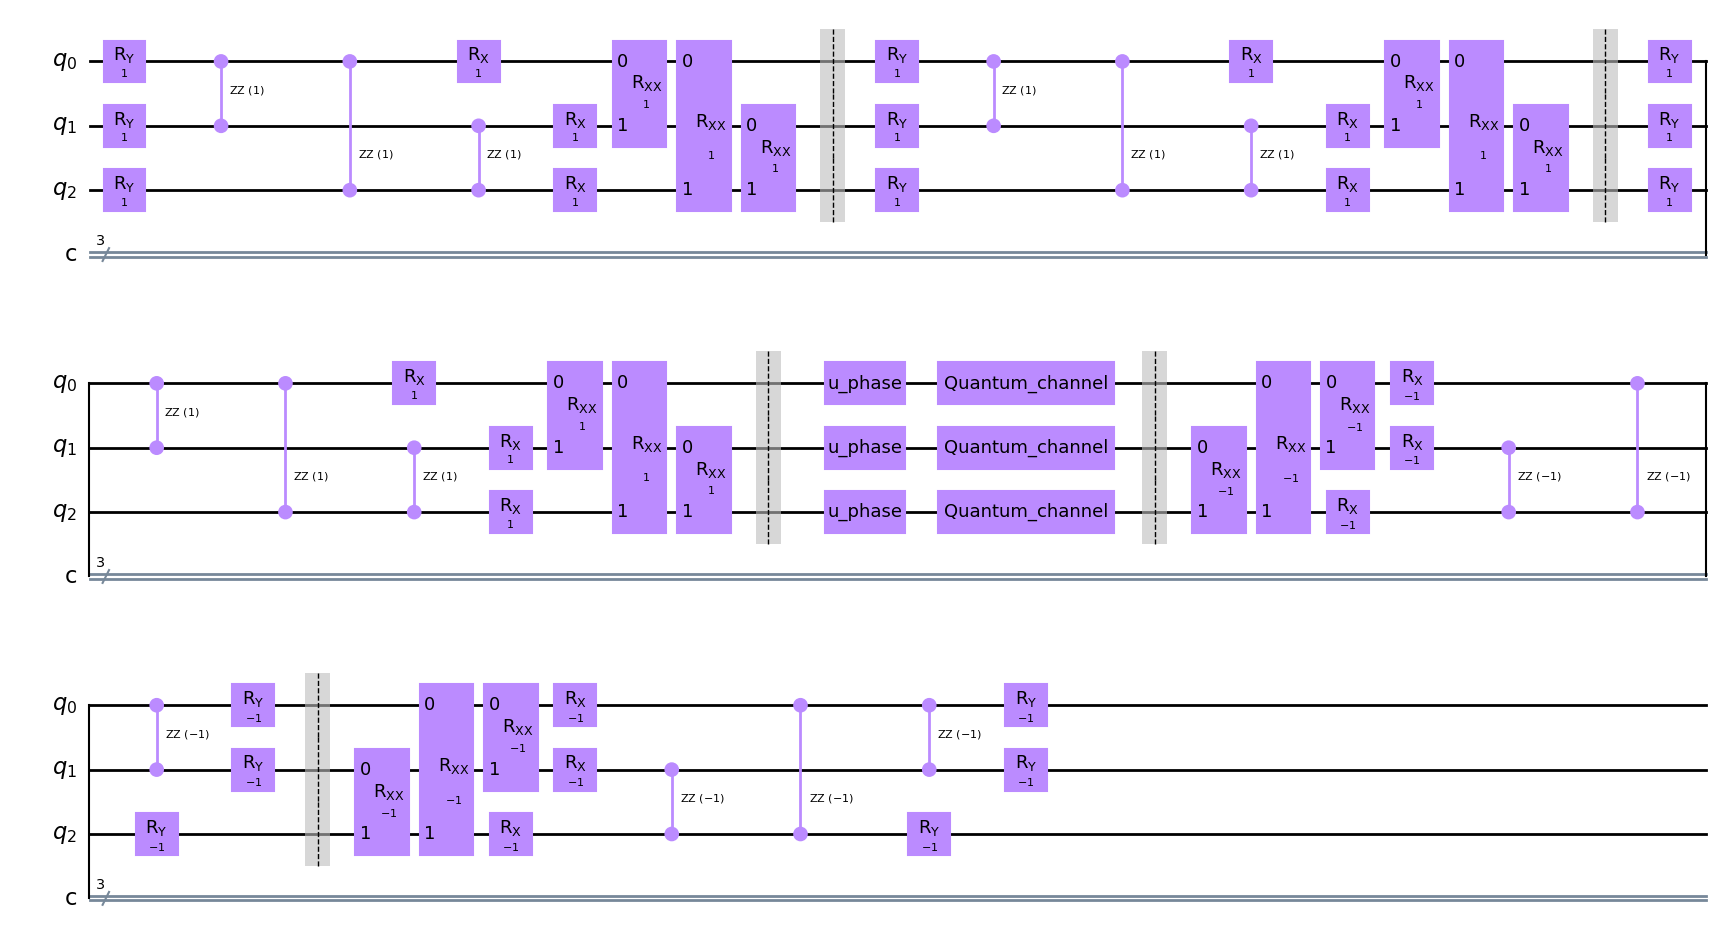

In [10]:
# set inital circuit parameters 
num_qubits = 3

num_layers = 3
num_layers_r = 2
t = 1.0

# set lambda and calcuate y

lamb = 0.7 #1 - np.exp(-t*y)
y = -np.log(1 - lamb)/t
print(y)

# set initial parameters
phases = np.array([np.pi/6., np.pi/6., np.pi/6.])
params1 = np.ones(tq.create_num_params("squeezing",num_qubits,num_layers))
params2 = np.ones(tq.create_num_params("squeezing",num_qubits,num_layers_r))

# set intial circuits
qcir1 = [tq.squeezing_ansatz,num_layers,params1]
qcir2 = [tq.u_phase,t,phases]
qcir3 = [tq.dephasing,t,y]
qcir4 = [tq.squeezing_ansatz_inv,num_layers_r,params2]

# input circuit
qcirs =[qcir1, qcir2, qcir3, qcir4]

# setup a model 
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
model = tq.qc_add(qc, qcirs)
model.draw('mpl')

In [ ]:
# training sld bound
# allways remember reset qc

import matplotlib.pyplot as plt
num_steps = 100

qcirs, costs = tq.training(qc,
               qcirs,
               which_train = [0, 3],
               #cost_func = tq.cls_bound,
               cost_func = tq.bound_sld_cls,            
               grad_func = tq.grad_cost,
               opt_func = tq.adam,
               num_steps = num_steps)

# plot
iterations = list(range(1, num_steps+1))
plt.plot(iterations, np.real(costs), '-')
plt.xlim(0, num_steps)

0 0.9109519227760885
1 0.8845657289411898
2 0.862619577999187
3 0.84298980050438
4 0.8254527722277416
5 0.8014012183316286
6 0.7794821711686926
7 0.7579633539783568
8 0.7309685243502995
9 0.7026007679773018
10 0.6826490898076418
11 0.6561744447499666
12 0.629319461028823
13 0.6354255857655402
14 0.5823727252701549
15 0.5821703900542972
16 0.5435190086191668
17 0.48804435015016734
18 0.4695829408379766
19 0.44600835978519804
20 0.43040836275593863
21 0.4217389896869008
22 0.413072825767566
23 0.40738910884436164
24 0.39720604916634117
25 0.39083565628019323
26 0.39003767587773397
27 0.3869042769286999
28 0.3803168501627704
29 0.38324526059068775
30 0.3723113969736538
31 0.36938229445923143
32 0.36720974915324023
33 0.36308991823635295
34 0.3653908964628205
35 0.3678353189317978
36 0.36712688358253165
37 0.3591520551828217
38 0.3666561256737816
39 0.3604885951402753
40 0.3676866569249684
41 0.36183971786475966
42 0.36870552322115613
43 0.36320447523598287
44 0.3697130547875046
45 0.36458

In [ ]:
# quantum fisher information matrix

qc = qiskit.QuantumCircuit(num_qubits,num_qubits)
qfim = tq.sld_qfim(qc,qcirs)
cfim = tq.cfim(qc,qcirs)

# cls bound and quantum bound
cb = tq.cls_bound(qc,qcirs)
qd = tq.sld_bound(qc, qcirs)

inv_cfim = np.linalg.inv(cfim + np.eye(len(cfim)) * 10e-10)
inv_qfim = np.linalg.inv(qfim + np.eye(len(qfim)) * 10e-10)

print(cb, qd, np.trace(cfim @ inv_qfim))

In [ ]:
# Calculate weak commutative
qc = qiskit.QuantumCircuit(num_qubits,num_qubits)
cir = tq.vqa.vqm.qc_add(qc.copy(), qcirs)
rho = tq.vqa.circuits.state_density(cir.copy())

L = tq.calculate_SLD(qc.copy(), qcirs)

d = 3
D = np.zeros((d,d))
for i in range(d):
    for j in range(d):
        D[i,j] = np.imag(np.trace(L[j]@L[i]@rho))
print(np.linalg.norm(D, 'fro'))  